## Mount Google Drive

The file structure of 3dgs directory is
- 3dgs
  - analysis (contaisn the csv file of views from different dataset)
  - data (dataset such as model and input sparse pictures provided by original paper)
  - gaussian-splatting (core code for running gaussian splatting)
  - output (*outdated*, only saves few output model)
  - splat (another work of gs, less relevant right now)
  - script.py (automated the log)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## On Cloud Space

In [ ]:
%cd /content
!git clone --recursive https://github.com/camenduru/gaussian-splatting
!pip install -q plyfile

%cd /content/gaussian-splatting
!pip install -q /content/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install -q /content/gaussian-splatting/submodules/simple-knn

!wget https://huggingface.co/camenduru/gaussian-splatting/resolve/main/tandt_db.zip
!unzip tandt_db.zip

!python train.py -s /content/gaussian-splatting/tandt/train

In [ ]:
%cd /content/drive/MyDrive/3dgs
!git clone --recursive https://github.com/camenduru/gaussian-splatting
!pip install -q plyfile

%cd /content/drive/MyDrive/3dgs/gaussian-splatting
!pip install -q /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install -q /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/simple-knn

!wget https://huggingface.co/camenduru/gaussian-splatting/resolve/main/tandt_db.zip
!unzip tandt_db.zip

!python train.py -s /content/drive/MyDrive/3dgs/gaussian-splatting/tandt/train

# !wget https://huggingface.co/camenduru/gaussian-splatting/resolve/main/GaussianViewTest.zip
# !unzip GaussianViewTest.zip
# !python render.py -m /content/gaussian-splatting/GaussianViewTest/model
# !ffmpeg -framerate 3 -i /content/gaussian-splatting/GaussianViewTest/model/train/ours_30000/renders/%05d.png -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -c:v libx264 -r 3 -pix_fmt yuv420p /content/renders.mp4
# !ffmpeg -framerate 3 -i /content/gaussian-splatting/GaussianViewTest/model/train/ours_30000/gt/%05d.png -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -c:v libx264 -r 3 -pix_fmt yuv420p /content/gt.mp4 -y

## On My Drive

In [ ]:
%cd /content/drive/MyDrive/3dgs
!git clone --recursive https://github.com/JiexiaoXu/gaussian-splatting.git
!pip install -q plyfile

In [ ]:
%cd /content/drive/MyDrive/3dgs/data
!unzip pre-trained.zip

In [ ]:
%cd /content/drive/MyDrive/3dgs
!mkdir data
%cd /content/drive/MyDrive/3dgs/data
!wget https://huggingface.co/camenduru/gaussian-splatting/resolve/main/tandt_db.zip
!unzip tandt_db.zip

## Handle Git

Change the branch

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
!git reset --hard HEAD
!git pull origin main

[Errno 2] No such file or directory: '/content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


## Training

First Part of code build environment for diff-gaussian-rasterization without showing compiler error.

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install -e .

/content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
Obtaining file:///content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Running setup.py develop for diff_gaussian_rasterization


In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/diff-gaussian-rasterization
!python setup.py install

Set up environment for plyfile and simple knn

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/submodules/simple-knn
!pip install -e .
!pip install -q plyfile

/content/drive/MyDrive/3dgs/gaussian-splatting/submodules/simple-knn
Obtaining file:///content/drive/MyDrive/3dgs/gaussian-splatting/submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Running setup.py develop for simple_knn


Training the model in format, only use the orignal gassian splatting code \\
``python train.py -s <path_to_data> --eval``

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting
!python train.py -s /content/drive/MyDrive/3dgs/gaussian-splatting/data/tandt/train/ --eval

## Evaluation

This code will capture the data from single view point. (Remember to switch the submodules to log the data)

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting
!python render_ray.py -m /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom -s /content/drive/MyDrive/3dgs/data/tandt/playroom --view_index 20 --skip_test

/content/drive/MyDrive/3dgs/gaussian-splatting
Looking for config file in /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/cfg_args
Config file found: /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/cfg_args
Rendering /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom
Loading trained model at iteration 30000 [13/11 00:34:11]
Reading camera 225/225 [13/11 00:37:02]
Loading Training Cameras [13/11 00:37:03]
Loading Test Cameras [13/11 00:37:09]
camera views len: 196 [13/11 00:37:29]
Rendering view 20 [13/11 00:37:29]
tensor([[ -9.2446,  -1.3603, -14.9202],
        [-11.5971,   1.2098, -14.8887],
        [ -9.5800,  -1.2399, -14.3334]], device='cuda:0') [13/11 00:37:29]
tensor([[-2.3525,  2.5701,  0.0315],
        [ 2.0171, -2.4497,  0.5553],
        [-2.1089,  2.7678,  0.1026]], device='cuda:0') [13/11 00:37:29]
1th percentile of z differences: 0.0 [13/11 00:37:30]
50th percentile of z differences: 2.86102294921875e-06 [13/11 00:37:30]
90th percentile of z di

# Statistics Check

Show the head of csv, check the correctness of log

In [ ]:
import pandas as pd

# Define chunk size (adjust as needed)
chunksize = 10000

# Iterate through chunks of the CSV file
for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
    # print column names
    print(chunk.head())
    break


   pixelNum  out_color_r  out_color_g  out_color_b  bg_color_r  bg_color_g  \
0         0     0.829420     0.593424     0.366778           0           0   
1         1     0.765639     0.532261     0.303179           0           0   
2         2     0.662973     0.440972     0.230457           0           0   
3         3     0.626541     0.405606     0.199537           0           0   
4         4     0.619613     0.400532     0.196010           0           0   

   bg_color_b  Gaussian_0_alpha  Gaussian_0_depth  Gaussian_0_color_r  ...  \
0           0          0.017906           7.60093            0.792074  ...   
1           0          0.018308           7.60093            0.792074  ...   
2           0          0.018546           7.60093            0.792074  ...   
3           0          0.018614           7.60093            0.792074  ...   
4           0          0.018512           7.60093            0.792074  ...   

   Gaussian_498_alpha  Gaussian_498_depth  Gaussian_498_color_

Compute the number of clusters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 10000

plt.figure(figsize=(10, 6))


for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_number += 1

    # Step 4: Process each row in the chunk
    for index, row in chunk.iterrows():
        transmittances = []
        depths = []
        T = 1.0  # Start transmittance at 1 (fully transparent)

        for i in range(150):  # Assuming there are 150 Gaussian values per row
            alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
            depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

            # Stop processing when 0.0 is encountered
            if alpha_val == 0.0 or depth_val == 0.0:
                break

            T *= (1 - alpha_val)  # Update transmittance
            transmittances.append(T)  # Store current transmittance
            depths.append(depth_val)  # Store corresponding depth

        if len(transmittances) == len(depths) and len(transmittances) > 0:
            # Plot the transmittance vs depth as a step plot (level graph)
            plt.step(depths, transmittances, where='post', label=f'Pixel {index}', alpha=0.7, marker="o", markersize=4)

    break

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot)')
plt.grid(True)

# Step 6: Show the plot
plt.show()


Plot the transmittance and depth graph

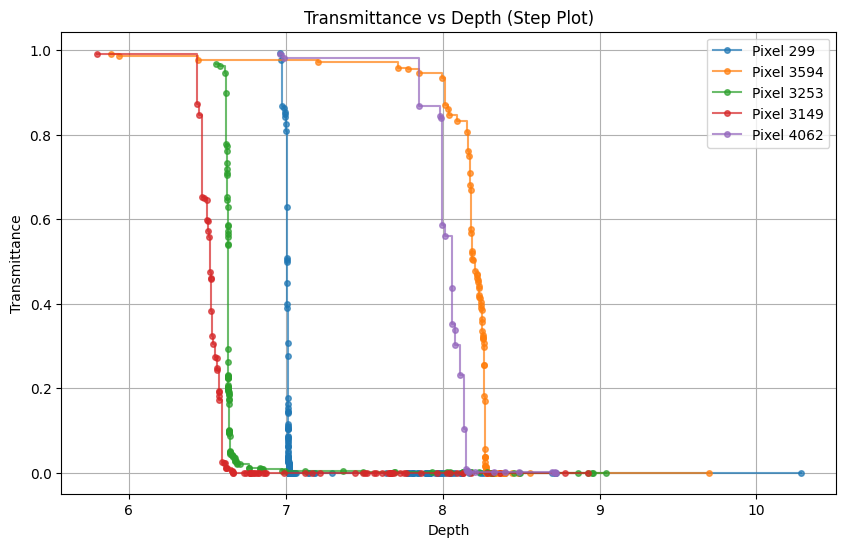

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Step 1: Load the entire CSV file
file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/update_playroom_20.csv'
df = pd.read_csv(file_path)

# Step 2: Randomly select a set of pixel numbers
num_samples = 5  # Number of random samples you want to plot
random_pixel_nums = random.sample(list(df['pixelNum']), num_samples)

# Step 3: Initialize the plot
plt.figure(figsize=(10, 6))

# Step 4: Process each randomly selected pixel number
for pixel_num in random_pixel_nums:
    row = df[df['pixelNum'] == pixel_num].iloc[0]  # Get the row corresponding to the pixel number

    transmittances = []
    depths = []
    T = 1.0  # Start transmittance at 1 (fully transparent)

    for i in range(300):  # Assuming there are 150 Gaussian values per row
        alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
        depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

        # Stop processing when 0.0 is encountered
        if alpha_val == 0.0 or depth_val == 0.0:
            break

        T *= (1 - alpha_val)  # Update transmittance
        transmittances.append(T)  # Store current transmittance
        depths.append(depth_val)  # Store corresponding depth

    if len(transmittances) == len(depths) and len(transmittances) > 0:
        # Plot the transmittance vs depth as a step plot (level graph)
        plt.step(depths, transmittances, where='post', label=f'Pixel {pixel_num}', alpha=0.7, marker="o", markersize=4)

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()



Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...


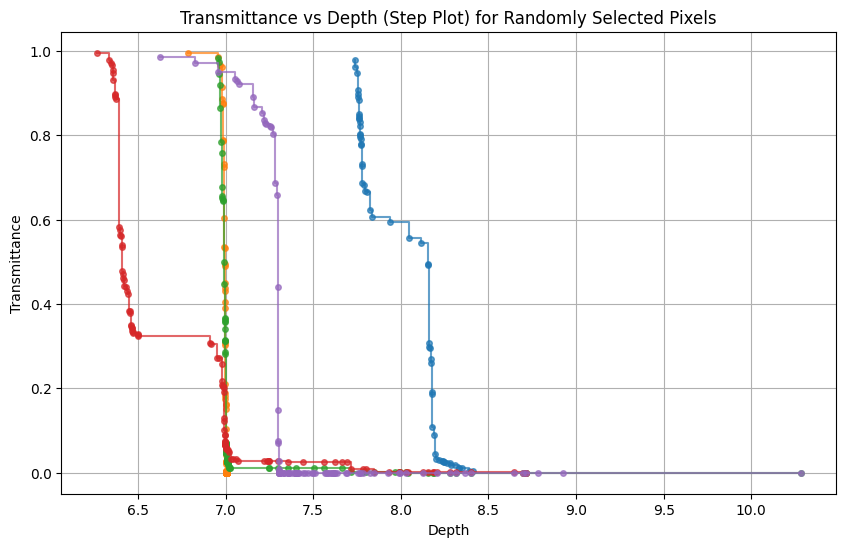

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Step 1: Define file path and chunk size
file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 100  # Adjust this size based on available memory
total_rows = 1000  # Adjust this based on your dataset (or calculate dynamically if needed)
random_pixels = sorted(random.sample(range(total_rows), 5))  # Pick 5 random rows (pixels)

# Step 2: Initialize plot
plt.figure(figsize=(10, 6))

# Step 3: Process the CSV in chunks
chunk_number = 0
row_counter = 0  # Global row counter to track which row we're on

for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_number += 1
    print(f"Processing chunk {chunk_number}...")

    # Step 4: Process only random selected rows in the chunk
    for index, row in chunk.iterrows():
        # Check if the current global row index is in the randomly selected pixels
        if row_counter in random_pixels:
            transmittances = []
            depths = []
            T = 1.0  # Start transmittance at 1 (fully transparent)

            for i in range(150):  # Assuming there are 150 Gaussian values per row
                alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
                depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

                # Stop processing when 0.0 is encountered
                if alpha_val == 0.0 or depth_val == 0.0:
                    break

                T *= (1 - alpha_val)  # Update transmittance
                transmittances.append(T)  # Store current transmittance
                depths.append(depth_val)  # Store corresponding depth

            # Only plot if we have valid transmittance and depth pairs
            if len(transmittances) == len(depths) and len(transmittances) > 0:
                # Plot the transmittance vs depth as a step plot (level graph)
                plt.step(depths, transmittances, where='post', label=f'Pixel {index}', alpha=0.7, marker="o", markersize=4)

        row_counter += 1  # Update the global row counter

    if row_counter >= max(random_pixels):  # Stop when we have processed the highest random pixel
        break

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot) for Randomly Selected Pixels')
plt.grid(True)

# Step 6: Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore
from tqdm import tqdm  # Progress bar

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/splat_tile.csv'

depth_diff = []
counts = []

with open(file_path, "r") as file:
    for line in tqdm(file, desc="Processing lines"):
        line = line.strip()
        values = [val for val in line.split(",") if val]

        count = 0
        prev = 0.0
        for depth_val in map(float, values):
            if (depth_val - prev) > 0.1174:
                depth_diff.append(depth_val - prev)
                count += 1
                prev = depth_val
        counts.append(count)  # Add count for this line to counts list

# Calculate statistics
print('Max number of clusters:', np.max(counts))
print('Min number of clusters:', np.min(counts))
print('1st percentile:', np.percentile(counts, 1))
print('90th percentile:', np.percentile(counts, 99))
print('Variance of number of clusters:', np.var(counts))
print('Average number of clusters:', np.mean(counts))

print("\n")

# Depth statistics
print('Max depth diff:', np.max(depth_diff))
print('Min depth diff:', np.min(depth_diff))
print('1st percentile:', np.percentile(depth_diff, 1))
print('5th percentile:', np.percentile(depth_diff, 5))
print('99th percentile:', np.percentile(depth_diff, 99))
print('Average depth diff:', np.mean(depth_diff))
print('Variance of depth diff:', np.var(depth_diff))


Processing lines: 4108it [00:01, 2919.05it/s]


Max number of clusters: 45
Min number of clusters: 17
1st percentile: 18.0
90th percentile: 43.0
Variance of number of clusters: 36.40823424784945
Average number of clusters: 31.046738072054527


Max depth diff: 2.9618900000000004
Min depth diff: 0.11740000000000039
1st percentile: 0.11743999999999932
5th percentile: 0.11760999999999999
99th percentile: 1.88721
Average depth diff: 0.295076855417908
Variance of depth diff: 0.14348142221509044


In [ ]:
# count clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import percentileofscore

# Read the CSV file
file_path = '/content/drive/MyDrive/3dgs/output/alpha_vals.csv'

data = pd.read_csv(file_path)

def count_clusters_by_depth (data):
    '''find the number of clusters at same depth for each row in the data'''
    counts = []
    depths = []
    for _, row in data.iterrows():
        count = 1
        depth = 0.0
        row_depths = []
        for i in range(150):
            alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
            depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

            if depth_val - depth > 5e-6:
                count += 1
                depth = depth_val

            if alpha_val == 0.0 or depth_val == 0.0:
                break
            row_depths.append(depth_val)  # Store corresponding depth
        counts.append(count)
        depths.append(np.var(row_depths))
    return counts, depths

counts, depths = count_clusters_by_depth(data)

# min, max, 1st and 99th percentile, variance and average of clusters
print('Max number of clusters at same depth:', np.max(counts))
print('Min number of clusters at same depth:', np.min(counts))
print('1st percentile:', np.percentile(counts, 1))
print('99th percentile:', np.percentile(counts, 99))
print('Variance of number of clusters at same depth:', np.var(counts))
print('Average number of clusters at same depth:', np.mean(counts))

# given 8 clusters, find corresponding percentile
value = 8
percentile_value = percentileofscore(counts, value)
print(f'The value {value} is at the {percentile_value}th percentile in the list.')


# min, max, and average of depth
print('Max depth:', np.max(depths))
print('Min depth:', np.min(depths))
print('Average depth:', np.mean(depths))



KeyboardInterrupt: 

The code below show the percentage of pixel that use less than 150 splats for the rendering part

In [ ]:
import pandas as pd

# Define chunk size (adjust as needed)
chunksize = 10000

# Initialize a counter for -1.0 values and total rows
total_neg_ones = 0
total_rows = 0

# Iterate through chunks of the CSV file
for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
    # Count 0.0 values in the current chunk
    neg_ones_in_chunk = (chunk['Gaussian_200_depth'] == 0.0).sum()

    # Update totals
    total_neg_ones += neg_ones_in_chunk
    total_rows += len(chunk)
    break

# Calculate and print the percentage
percentage = total_neg_ones / total_rows
print(percentage)

0.9631


This code give the percentile of alpha values for all splats

Total valid alpha values: 58943621
1st percentile: 0.00406362
98th percentile: 0.652042
Mean: 0.0854766615706086


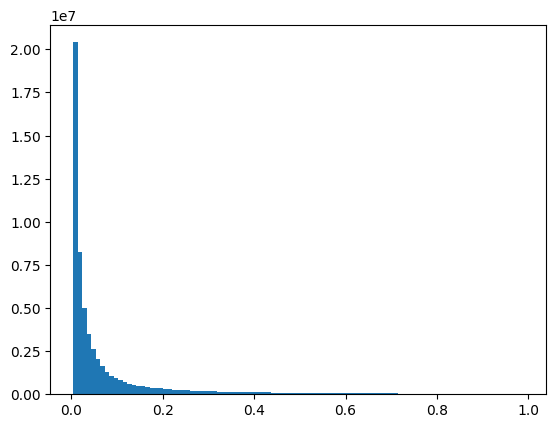

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# Define chunk size
chunksize = 10000

# Function to process a single chunk and extract valid alpha values
def process_chunk(chunk):
    # Collect all the alpha column names
    alpha_columns = [col for col in chunk.columns if 'alpha' in col]

    # Extract valid alpha values using vectorized operations
    valid_alphas_chunk = chunk[alpha_columns].values
    valid_alphas_chunk = valid_alphas_chunk[valid_alphas_chunk != -1]

    # Return the valid alpha values
    return valid_alphas_chunk

# Initialize a list to store valid alpha values
alpha_vals = []

# Read the CSV file in chunks and process each chunk in parallel
with ProcessPoolExecutor() as executor:
    # Submit each chunk to the process pool for parallel processing
    futures = []
    for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
        futures.append(executor.submit(process_chunk, chunk))

    # Collect results from each processed chunk
    for future in futures:
        alpha_vals.extend(future.result())

# Calculate percentiles and mean using NumPy
alpha_vals = np.array(alpha_vals)
percentile_1 = np.percentile(alpha_vals, 1)
percentile_98 = np.percentile(alpha_vals, 98)
mean_val = np.mean(alpha_vals)

# Print the results
print(f"Total valid alpha values: {len(alpha_vals)}")
print(f"1st percentile: {percentile_1}")
print(f"98th percentile: {percentile_98}")
print(f"Mean: {mean_val}")

# Plot the histogram of alpha values
plt.hist(alpha_vals, bins=100)
plt.show()


Check the depth of each tile

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
from PIL import Image, ImageDraw
from itertools import chain
import csv

def collect_min_dist(data, epsilon):
    dist_pix = dict()
    counts = []
    for idx, (_, row) in enumerate(data.iterrows()):
        pixel_dist = []
        depth = 0.0
        row = row.dropna().tolist()
        count = 0

        row = [float(x) for x in row if x]

        for i in range(1, len(row), 2):
            if row[i] - depth > epsilon:
                pixel_dist.append(row[i] - depth)
                depth = row[i]
                count += 1

        # Skip if only one cluster exists
        counts.append(count)
        if count == 0:
            continue

    return counts, dist_pix

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/splat_tile.csv'
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

data = pd.DataFrame(data)
counts, dist_pix = collect_min_dist(data, 5e-6)



## Evaluate the quality of clustering algorithm

The following code proves that data collected from the cuda kernel is free of error.

In [ ]:
from PIL import Image
import random
import pandas as pd

# Function to compute the color using the alpha and RGB values from Gaussian splats
def compute_color(row):
    # Initialize final color (R, G, B) and alpha
    final_color_r = 0.0
    final_color_g = 0.0
    final_color_b = 0.0
    final_t = 1.0

    # Iterate through each Gaussian (0 to 149)
    for i in range(150):
        alpha = row[f'Gaussian_{i}_alpha']
        if alpha == 0:
            break  # Stop if we encounter alpha = 0

        # Get the current Gaussian's RGB values
        color_r = row[f'Gaussian_{i}_color_r']
        color_g = row[f'Gaussian_{i}_color_g']
        color_b = row[f'Gaussian_{i}_color_b']

        # Compute the blended color using the alpha compositing formula
        final_color_r += final_t * alpha * color_r
        final_color_g += final_t * alpha * color_g
        final_color_b += final_t * alpha * color_b

        final_t = final_t * (1 - alpha)
    # Return the final computed RGB color as a tuple
    return (final_color_r, final_color_g, final_color_b)

def get_row_from_csv(file_path, row_index, chunksize=10000):
    # Read the file in chunks of size `chunksize`
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        if row_index >= chunk.index[0] and row_index <= chunk.index[-1]:
            # If the row index is in this chunk, return the row
            return chunk.iloc[row_index - chunk.index[0]]
    return None  # If the row is not found (just in case)

# Open the image file
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/drjohnson/train/ours_30000/renders/00020.png')

# Get the width and height of the image
width, height = image.size
print (f"total pixel {width * height}")

# Pick random x and y coordinates between 0 and the width and height of the image
x = random.randint(0, width - 1)
y = random.randint(0, height - 1)

# Get the RGB value of the pixel at (x, y)
rgb_value = image.getpixel((x, y))

# Print the RGB value of the randomly selected pixel
print(f"RGB value at ({x}, {y}): {rgb_value}")

# Compute pixelNum based on the x and y coordinates (row-major order)
pixNum = x + y * width
print(f"Pixel number in CSV: {pixNum}")

# Read the CSV file and retrieve the corresponding row for the pixel
pix_row = get_row_from_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', pixNum)

# Compute the final color using the Gaussian splats in the CSV
final_color = compute_color(pix_row)

# Print the computed color from the Gaussian splats
print(f"Computed color from Gaussian splats for pixel {pixNum}: {final_color}")
print(pix_row)
# print(f"Ground truth at ({x}, {y}): {pix_row[""]}")


total pixel 1166832
RGB value at (868, 267): (93, 62, 42)
Pixel number in CSV: 356512
Size of csv: (1166832, 757)
Computed color from Gaussian splats for pixel 356512: (0.3645718491198101, 0.24213061416743156, 0.16581358205736954)
pixelNum                pixel 356512
out_color_r                 0.364604
out_color_g                  0.24214
out_color_b                 0.165837
bg_color_r                         0
                            ...     
Gaussian_149_alpha                 0
Gaussian_149_depth                 0
Gaussian_149_color_r               0
Gaussian_149_color_g               0
Gaussian_149_color_b               0
Name: 356512, Length: 757, dtype: object


## This code shows the color of splats that is at the same depth

In [ ]:
import pandas as pd

# File paths
input_file_path = '/content/drive/MyDrive/3dgs/output/alpha_vals.csv'
output_file_path = 'sampled_out_playroom_20.csv'

num_samples = 100

df = pd.read_csv(input_file_path)

sampled_df = df.sample(n=num_samples)
sampled_df.to_csv(output_file_path, index=False)

full sorting RGB value at (855, 515): (235, 157, 45)
Ground truth RGB value at (855, 515): (235, 155, 42)
Sorting: the difference from ground truth RGB values is: 3.605551275463989
out_color_r: 234.99933
out_color_g: 156.83673
out_color_b: 45.11715
1
{4.53477: [(0.0100876, (0.854731, 0.571451, 0.15084)), (0.0652312, (0.925566, 0.646619, 0.224137)), (0.56892, (0.837099, 0.514768, 0.0717303)), (0.00507236, (0.94205, 0.640382, 0.228285)), (0.0836104, (0.942747, 0.633733, 0.0909188)), (0.0771679, (0.94736, 0.618476, 0.160306)), (0.0134856, (0.926998, 0.583809, 0.0903778)), (0.105579, (0.934226, 0.647016, 0.215696)), (0.00777061, (0.922581, 0.612252, 0.221273)), (0.474428, (0.928894, 0.61631, 0.113415)), (0.147884, (0.90307, 0.587632, 0.0558278)), (0.0108368, (0.921398, 0.632718, 0.18357)), (0.0474065, (0.842455, 0.555036, 0.134753)), (0.0716569, (0.929259, 0.602616, 0.132937)), (0.0441813, (0.921003, 0.607359, 0.191109)), (0.0225607, (0.860398, 0.663264, 0.218245)), (0.00721869, (0.886324,

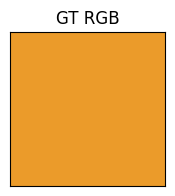

ValueError: RGBA values should be within 0-1 range

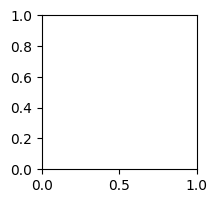

In [ ]:
from typing_extensions import final
# Randomly pull out a row from csv file
# Show the color from fully sorting splats
# Show the ground truth
# show the color from our clustering

from PIL import Image
import random
import pandas as pd
import matplotlib.pyplot as plt
import math

def create_tuple_for_splat(row):
    splats = []
    for i in range(150):
        alpha = row[f'Gaussian_{i}_alpha']
        depth = row[f'Gaussian_{i}_depth']
        color_r = row[f'Gaussian_{i}_color_r']
        color_g = row[f'Gaussian_{i}_color_g']
        color_b = row[f'Gaussian_{i}_color_b']

        # Only plot valid splats (skip if alpha is 0 or depth is irrelevant)
        if alpha > 0:
            splats.append((depth, alpha, color_r, color_g, color_b))
    return splats

def rgb_diff(gt_rgb_value, rgb_value):
    # Return the squared difference between ground truth and input RGB values
    return math.sqrt(sum((v1 - v2) ** 2 for v1, v2 in zip(gt_rgb_value, rgb_value)))

def cluster(splats):
  m = dict()
  closest_key = -1.0;
  for i in range(len(splats)):
      depth, alpha, color_r, color_g, color_b = splats[i]
      rgb_value = (color_r, color_g, color_b)

      if len(m.keys()) == 0:
        m[depth] = [(alpha, rgb_value)]
        closest_key = depth
      else:
        closest_key = min(m.keys(), key=lambda k: abs(k - depth))
        if depth - closest_key < 0.11:
          m[closest_key].append((alpha, rgb_value))
        else:
          m[depth] = [(alpha, rgb_value)]

  # sort the map by key
  m = dict(sorted(m.items()))

  # print few items of m
  print(dict(list(m.items())[0:5]))
  alpha_color = []
  for key in m.keys():
    final_alpha = 1.0
    final_color = (0.0, 0.0, 0.0)
    for alpha, color in m[key]:
      final_alpha *= (1 - alpha)
      final_color = (final_color[0] + alpha * color[0], final_color[1] + alpha * color[1], final_color[2] + alpha * color[2])
    final_alpha = 1 - final_alpha
    final_color = (final_color[0] * final_alpha, final_color[1] * final_alpha, final_color[2] * final_alpha)
    alpha_color.append((final_alpha, final_color))

  print(alpha_color[0:2])
  final_r = 0.0;
  final_g = 0.0;
  final_b = 0.0;
  final_t = 1.0;

  # iterate each item in m
  for alpha, color in alpha_color:
    # get the alpha and color
    final_r += final_t * alpha * color[0]
    final_g += final_t * alpha * color[1]
    final_b += final_t * alpha * color[2]
    final_t = final_t * (1 - alpha)

  return (final_r * 255, final_g * 255, final_b * 255)


image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
gt_image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png')

# Get the width and height of the image and random pick x,y
width, height = image.size
pixel_num = 651815
x = pixel_num % width
y = pixel_num // width

# Get the RGB value of the pixel at (x, y)
rgb_value = image.getpixel((x, y))
gt_rgb_value = gt_image.getpixel((x, y))
print(f"full sorting RGB value at ({x}, {y}): {rgb_value}")
print(f"Ground truth RGB value at ({x}, {y}): {gt_rgb_value}")
print("Sorting: the difference from ground truth RGB values is:", rgb_diff(gt_rgb_value, rgb_value))

df = pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/sampled_out_playroom_20.csv')
pix_row = df.iloc[0]

out_color_r = pix_row["out_color_r"]
out_color_g = pix_row["out_color_g"]
out_color_b = pix_row["out_color_b"]

# Print the color
print(f"out_color_r: {out_color_r * 255}")
print(f"out_color_g: {out_color_g * 255}")
print(f"out_color_b: {out_color_b * 255}")

splats = create_tuple_for_splat(pix_row)

# shuffle the splats
random.shuffle(splats)

clustered_rgb = cluster(splats)
print(f"Clustered RGB value at ({x}, {y}): {clustered_rgb}")
diff = rgb_diff(gt_rgb_value, clustered_rgb)
print("Clustering: The difference from ground truth values is:", diff)

rgb_color = (gt_rgb_value[0] / 255, gt_rgb_value[1] / 255, gt_rgb_value[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("GT RGB")
plt.show()

rgb_color = (clustered_rgb[0] / 255, clustered_rgb[1] / 255, clustered_rgb[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Clustered RGB")
plt.show()



full sorting RGB value at (1174, 727): (165, 94, 3)
Ground truth RGB value at (1174, 727): (164, 93, 3)
Sorting: the difference from ground truth RGB values is: 1.4142135623730951
out_color_r: 165.28411499999999
out_color_g: 93.799455
out_color_b: 2.718249
Clustered RGB value at (1174, 727): (165.63913971480295, 94.0408914380482, 2.5180521730418204)
Clustering: The difference from ground truth values is: 2.000626826361197


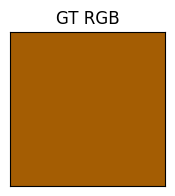

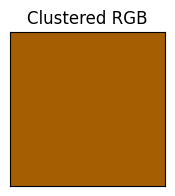

In [ ]:
from typing_extensions import final
# Randomly pull out a row from csv file
# Show the color from fully sorting splats
# Show the ground truth
# show the color from our clustering

from PIL import Image
import random
import pandas as pd
import matplotlib.pyplot as plt
import math

def get_row_by_pixel_num(file_path, row_index):
    df = pd.read_csv(file_path)
    return df.loc[row_index]

def create_tuple_for_splat(row):
    splats = []
    for i in range(150):
        alpha = row[f'Gaussian_{i}_alpha']
        depth = row[f'Gaussian_{i}_depth']
        color_r = row[f'Gaussian_{i}_color_r']
        color_g = row[f'Gaussian_{i}_color_g']
        color_b = row[f'Gaussian_{i}_color_b']

        # Only plot valid splats (skip if alpha is 0 or depth is irrelevant)
        if alpha > 0:
            splats.append((depth, alpha, color_r, color_g, color_b))
    return splats

def rgb_diff(gt_rgb_value, rgb_value):
    # Return the squared difference between ground truth and input RGB values
    return math.sqrt(sum((v1 - v2) ** 2 for v1, v2 in zip(gt_rgb_value, rgb_value)))

def cluster(splats):
  m = dict()

  # Add the item to closest depth
  closest_key = -1.0;
  for i in range(len(splats)):
      depth, alpha, color_r, color_g, color_b = splats[i]
      rgb_value = (color_r, color_g, color_b)

      for key in m.keys():
        if abs(key - depth) < abs(key - closest_key):
          closest_key = key

      if len(m.keys()) == 0:
        m[depth] = [(alpha, rgb_value)]
        closest_key = depth
      else:
        if depth - closest_key < 5e-6:
          m[closest_key].append((alpha, rgb_value))
        else:
          m[depth] = [(alpha, rgb_value)]

  # sort the map by key
  m = dict(sorted(m.items()))
  alpha_color = []
  for key in m.keys():
    sum_alpha = sum(a for a, _ in m[key])
    alpha_color = []
    for alpha, color in m[key]:
      alpha = alpha / sum_alpha
      alpha_color.append((alpha / sum_alpha) * color)
    alpha_color = sum(alpha_color)

  final_r = 0.0;
  final_g = 0.0;
  final_b = 0.0;
  final_t = 1.0;

  # iterate each item in m
  for key in m:
    # get the alpha and color
    for alpha, color in m[key]:
      final_r += final_t * alpha * color[0]
      final_g += final_t * alpha * color[1]
      final_b += final_t * alpha * color[2]
      final_t = final_t * (1 - alpha)

  return (final_r * 255, final_g * 255, final_b * 255)


image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
gt_image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png')

# Get the width and height of the image and random pick x,y
width, height = image.size
x = random.randint(0, width - 1)
y = random.randint(0, height - 1)

# Get the RGB value of the pixel at (x, y)
rgb_value = image.getpixel((x, y))
gt_rgb_value = gt_image.getpixel((x, y))
print(f"full sorting RGB value at ({x}, {y}): {rgb_value}")
print(f"Ground truth RGB value at ({x}, {y}): {gt_rgb_value}")
print("Sorting: the difference from ground truth RGB values is:", rgb_diff(gt_rgb_value, rgb_value))

pixNum = x + y * width
pix_row = get_row_by_pixel_num('/content/drive/MyDrive/3dgs/gaussian-splatting/sampled_out_playroom_20.csv', pixNum)

out_color_r = pix_row["out_color_r"]
out_color_g = pix_row["out_color_g"]
out_color_b = pix_row["out_color_b"]

# Print the color
print(f"out_color_r: {out_color_r * 255}")
print(f"out_color_g: {out_color_g * 255}")
print(f"out_color_b: {out_color_b * 255}")

splats = create_tuple_for_splat(pix_row)

# shuffle the splats
random.shuffle(splats)

clustered_rgb = cluster(splats)
print(f"Clustered RGB value at ({x}, {y}): {clustered_rgb}")
diff = rgb_diff(gt_rgb_value, clustered_rgb)
print("Clustering: The difference from ground truth values is:", diff)

rgb_color = (gt_rgb_value[0] / 255, gt_rgb_value[1] / 255, gt_rgb_value[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("GT RGB")
plt.show()

rgb_color = (clustered_rgb[0] / 255, clustered_rgb[1] / 255, clustered_rgb[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Clustered RGB")
plt.show()



This code read the entire dataset, output the error graph for all pixels

Find the pixel where the clustering algorithm is underperfoming

Reading CSV Chunks:   0%|          | 0/53 [00:00<?, ?it/s]

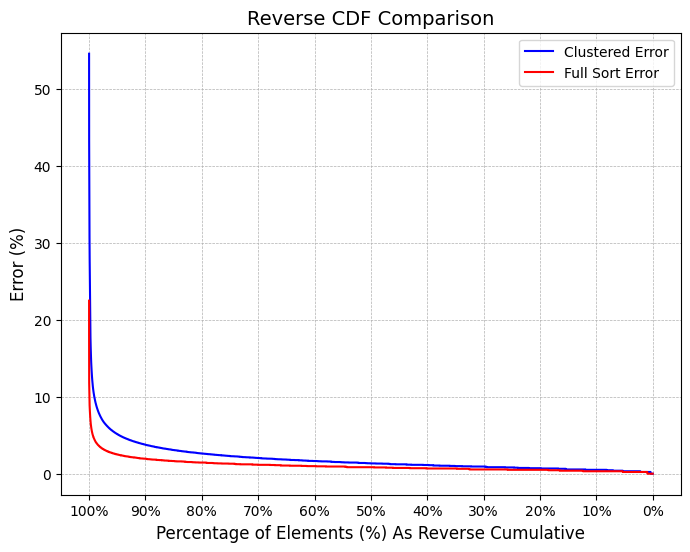

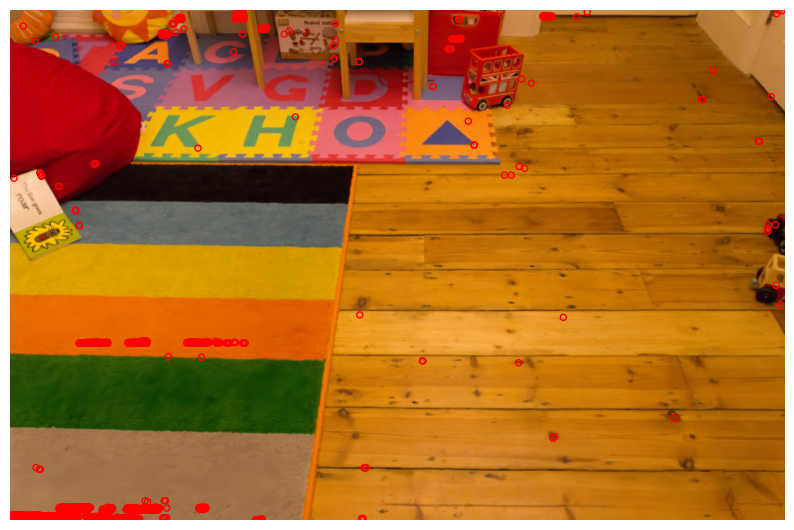

In [ ]:
from tqdm.notebook import tqdm  # Import notebook-specific tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from joblib import Parallel, delayed  # For parallel processing
import math
from matplotlib.patches import Circle

def create_tuple_for_splat(row):
    # Use list comprehension for faster tuple creation
    return [
        (row[f'Gaussian_{i}_depth'], row[f'Gaussian_{i}_alpha'],
         row[f'Gaussian_{i}_color_r'], row[f'Gaussian_{i}_color_g'], row[f'Gaussian_{i}_color_b'])
        for i in range(150) if row[f'Gaussian_{i}_alpha'] > 0
    ]

def rgb_diff(gt_rgb_value, rgb_value):
    rgb1, rgb2 = np.array(gt_rgb_value), np.array(rgb_value)
    dist = np.linalg.norm(rgb1 - rgb2)  # Euclidean distance
    max_distance = np.sqrt(3 * (255 ** 2))  # Max possible distance
    return (dist / max_distance) * 100  # Percentage error

def cluster(splats):
    # Optimized clustering using defaultdict
    depth_map = defaultdict(list)
    for depth, alpha, r, g, b in splats:
        depth_map[depth].append((alpha, (r, g, b)))

    sorted_depths = sorted(depth_map.items())
    final_r = final_g = final_b = 0.0
    final_t = 1.0

    # Composite final RGB value
    for _, items in sorted_depths:
        for alpha, (r, g, b) in items:
            final_r += final_t * alpha * r
            final_g += final_t * alpha * g
            final_b += final_t * alpha * b
            final_t *= (1 - alpha)

    return tuple(int(val * 255) for val in (final_r, final_g, final_b))

def reverse_cdf(errors1, errors2, title1, title2):
    # Prepare data
    sorted_data1 = np.sort(errors1)
    cumulative_percent1 = np.linspace(100, 0, len(errors1))
    sorted_data2 = np.sort(errors2)
    cumulative_percent2 = np.linspace(100, 0, len(errors2))

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_percent1, sorted_data1, linestyle='-', color='b', markersize=1, label=title1)
    plt.plot(cumulative_percent2, sorted_data2, linestyle='-', color='r', markersize=1, label=title2)


    # Change X axis
    plt.xticks(
        ticks=np.linspace(0, 100, 11),  # Create 11 evenly spaced ticks (0%, 10%, ..., 100%)
        labels=[f"{int(100 - i)}%" for i in np.linspace(0, 100, 11)]  # Labels from 100% to 0%
    )

    plt.xlabel('Percentage of Elements (%) As Reverse Cumulative', fontsize=12)
    plt.ylabel('Error (%)', fontsize=12)
    plt.title('Reverse CDF Comparison', fontsize=14)
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

def process_row(row, width, image_pixels, gt_pixels):
    """Process a single row to compute errors."""
    x = row['pixelNum'] % width
    y = row['pixelNum'] // width

    sort_rgb_value = image_pixels[x, y]
    gt_rgb_value = gt_pixels[x, y]

    sort_diff = rgb_diff(gt_rgb_value, sort_rgb_value)
    splats = create_tuple_for_splat(row)
    random.shuffle(splats)
    clustered_rgb = cluster(splats)
    cluster_diff = rgb_diff(gt_rgb_value, clustered_rgb)

    underperform_pixel = None
    if cluster_diff - sort_diff > 20:
        underperform_pixel = (x, y)

    return sort_diff, cluster_diff, underperform_pixel

def highlight_underperform_pixels(image_path, underperform_pixels):
    """Function to display the image with circles around underperforming pixels."""
    # Load the image with matplotlib
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)

    # Draw circles around underperforming pixels
    for (x, y) in underperform_pixels:
        circle = Circle((x, y), radius=5, color='red', fill=False, linewidth=1)
        ax.add_patch(circle)

    # Hide axes for cleaner visualization
    ax.axis('off')
    plt.show()

# Load images and convert them to pixel arrays for fast access
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
gt_image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png')
width, height = image.size
image_pixels = image.load()
gt_pixels = gt_image.load()

# Initialize error lists
cluster_err = []
full_sort_err = []
underperform_pixels = []

csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 20000
total_chunks = math.ceil(width * height / chunksize)

for chunk in tqdm(pd.read_csv(csv_path, chunksize=chunksize), desc="Reading CSV Chunks", total=total_chunks):
    results = Parallel(n_jobs=10, backend='threading')(
        delayed(process_row)(row, width, image_pixels, gt_pixels)
        for _, row in chunk.iterrows()
    )

    # Collect results
    for sort_diff, cluster_diff, pixel in results:
        full_sort_err.append(sort_diff)
        cluster_err.append(cluster_diff)
        if pixel is not None:
            underperform_pixels.append(pixel)

# Plot errors using reverse CDF
reverse_cdf(cluster_err, full_sort_err, "Clustered Error", "Full Sort Error")

# Circle the underperform pixels in rendered image
highlight_underperform_pixels(
    '/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png',
    underperform_pixels
)

Reading CSV Chunks:   0%|          | 0/53 [00:00<?, ?it/s]

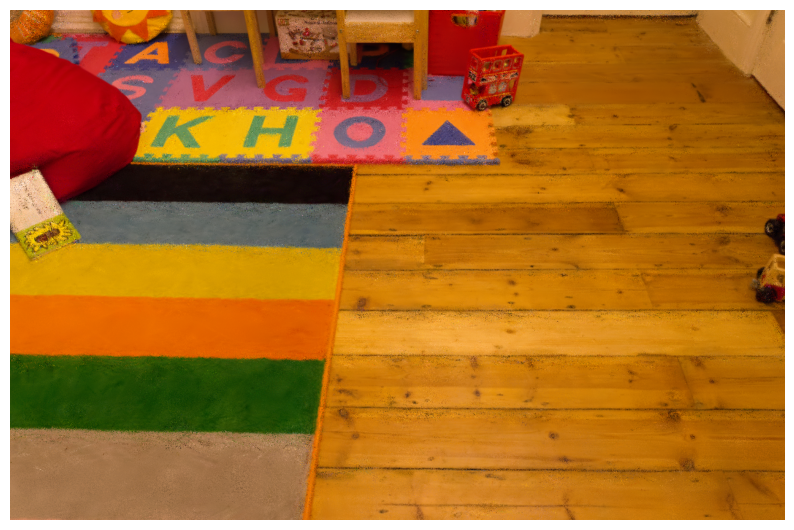

Reconstructed image saved!


In [ ]:
from tqdm.notebook import tqdm  # Import notebook-specific tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from joblib import Parallel, delayed  # For parallel processing
import math


def create_tuple_for_splat(row):
    # Use list comprehension for faster tuple creation
    return [
        (row[f'Gaussian_{i}_alpha'], row[f'Gaussian_{i}_depth'],
         row[f'Gaussian_{i}_color_r'], row[f'Gaussian_{i}_color_g'], row[f'Gaussian_{i}_color_b'])
        for i in range(500) if row[f'Gaussian_{i}_alpha'] > 0
    ]

def cluster(splats):
    """Cluster and compute the final RGB value from splats."""
    m = dict()
    for i in range(len(splats)):
        alpha, depth, color_r, color_g, color_b = splats[i]
        rgb_value = (color_r, color_g, color_b)

        if len(m.keys()) == 0:
          m[depth] = [(alpha, rgb_value)]
        else:
          closest_key = min(m.keys(), key=lambda k: abs(k - depth))
          if abs(depth - closest_key) < 0.11:
            m[closest_key].append((alpha, rgb_value))
          else:
            m[depth] = [(alpha, rgb_value)]

    # sort the map by key
    m = dict(sorted(m.items()))

    alpha_color = []
    for key in m.keys():
        final_alpha = 1.0
        final_color = (0.0, 0.0, 0.0)

        # Iterate through each item in m
        for alpha, color in m[key]:
            final_color = (
                final_color[0] + final_alpha * alpha * color[0],
                final_color[1] + final_alpha * alpha * color[1],
                final_color[2] + final_alpha * alpha * color[2],
            )
            final_alpha *= (1 - alpha)

        final_alpha = 1 - final_alpha
        final_alpha = min(max(final_alpha, 0.0), 1.0)

        if final_alpha > 0:
            final_color = (
                final_color[0] / final_alpha,
                final_color[1] / final_alpha,
                final_color[2] / final_alpha,
            )
        else:
            final_color = (0.0, 0.0, 0.0)

        final_color = (
            min(max(final_color[0], 0.0), 1.0),
            min(max(final_color[1], 0.0), 1.0),
            min(max(final_color[2], 0.0), 1.0),
        )

        alpha_color.append((final_alpha, final_color))

    final_r = 0.0;
    final_g = 0.0;
    final_b = 0.0;
    final_t = 1.0;

    # iterate each item in m
    for alpha, color in alpha_color:
      # get the alpha and color
      final_r += final_t * alpha * color[0]
      final_g += final_t * alpha * color[1]
      final_b += final_t * alpha * color[2]
      final_t = final_t * (1 - alpha)

      if final_t <= 0:
        break

    # print(f"final_r is {final_r}")
    # print(f"final_g is {final_g}")
    # print(f"final_b is {final_b}")
    return (final_r * 255, final_g * 255, final_b * 255)

def process_row(row, width):
    """Process a row to compute the clustered RGB value."""
    x = int(row['pixelNum'] % width)
    y = int(row['pixelNum'] // width)

    splats = create_tuple_for_splat(row)
    random.shuffle(splats)
    clustered_rgb = cluster(splats)

    return x, y, clustered_rgb

# Load CSV data in chunks and initialize the pixel array
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
width, height = image.size  # Replace with your image dimensions
reconstructed_image = np.zeros((height, width, 3), dtype=np.uint8)

csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 20000
total_chunks = math.ceil(width * height / chunksize)

# Process the CSV and fill the pixel array
for chunk in tqdm(pd.read_csv(csv_path, chunksize=chunksize), desc="Reading CSV Chunks", total=total_chunks):
    results = Parallel(n_jobs=10, backend='threading')(
        delayed(process_row)(row, width) for _, row in chunk.iterrows()
    )

    # Populate the pixel array with clustered RGB values
    for x, y, clustered_rgb in results:
        if 0 <= x < width and 0 <= y < height:  # Ensure the indices are within bounds
            reconstructed_image[y, x] = np.array(clustered_rgb, dtype=np.uint8)

# Convert the pixel array to an image
final_image = Image.fromarray(reconstructed_image)

# Display the reconstructed image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(final_image)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Optionally, save the image
final_image.save("/content/reconstructed_image.png")
print("Reconstructed image saved!")


## Analysis

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/analysis/train/view20/alpha_vals.csv /content/drive/MyDrive/3dgs/output/train/train/ours_30000/renders/00020.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 495768: (868, 505)
Pixel coordinates for minimum distance 389965: (905, 397)
Pixel coordinates for minimum distance 434047: (887, 442)
Pixel coordinates for minimum distance 493854: (914, 503)
Pixel coordinates for minimum distance 419324: (864, 427)
Figure(1200x800)
Figure(640x480)


In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/analysis/train/view50/alpha_vals.csv /content/drive/MyDrive/3dgs/output/train/train/ours_30000/renders/00050.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 261376: (696, 266)
Pixel coordinates for minimum distance 261373: (693, 266)
Pixel coordinates for minimum distance 261377: (697, 266)
Pixel coordinates for minimum distance 262353: (693, 267)
Pixel coordinates for minimum distance 262355: (695, 267)
Pixel coordinates for minimum distance 262356: (696, 267)
Pixel coordinates for minimum distance 263333: (693, 268)
Pixel coordinates for minimum distance 260393: (693, 265)
Pixel coordinates for minimum distance 261374: (694, 266)
Pixel coordinates for minimum distance 262354: (694, 267)
Pixel coordinates for minimum distance 262357: (697, 267)
Pixel coordinates for minimum distance 263334: (694, 268)
Pixel coordinates for minimum distance 263335: (695, 268)
Pixel coordinates for minimum distance 263336: (696, 268)
Pixel coordinates for minimum distance 263337: (697, 268)
Pixel coordinates for minimum distance 260397: (697, 265)
Pixel coordinates fo

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/analysis/train/view00/alpha_vals.csv /content/drive/MyDrive/3dgs/output/train/train/ours_30000/renders/00000.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 330010: (730, 336)
Pixel coordinates for minimum distance 330008: (728, 336)
Pixel coordinates for minimum distance 330009: (729, 336)
Pixel coordinates for minimum distance 332949: (729, 339)
Pixel coordinates for minimum distance 332950: (730, 339)
Pixel coordinates for minimum distance 334908: (728, 341)
Pixel coordinates for minimum distance 333929: (729, 340)
Pixel coordinates for minimum distance 333930: (730, 340)
Pixel coordinates for minimum distance 334910: (730, 341)
Pixel coordinates for minimum distance 343726: (726, 350)
Figure(1200x800)
Figure(640x480)


In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/analysis/train/view100/alpha_vals.csv /content/drive/MyDrive/3dgs/output/train/train/ours_30000/renders/00100.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 245321: (321, 250)
Pixel coordinates for minimum distance 277657: (317, 283)
Pixel coordinates for minimum distance 244342: (322, 249)
Pixel coordinates for minimum distance 245320: (320, 250)
Pixel coordinates for minimum distance 274720: (320, 280)
Pixel coordinates for minimum distance 274721: (321, 280)
Pixel coordinates for minimum distance 276681: (321, 282)
Pixel coordinates for minimum distance 277656: (316, 283)
Pixel coordinates for minimum distance 279616: (316, 285)
Pixel coordinates for minimum distance 279617: (317, 285)
Pixel coordinates for minimum distance 280596: (316, 286)
Pixel coordinates for minimum distance 280597: (317, 286)
Pixel coordinates for minimum distance 280599: (319, 286)
Pixel coordinates for minimum distance 245317: (317, 250)
Pixel coordinates for minimum distance 273740: (320, 279)
Pixel coordinates for minimum distance 277660: (320, 283)
Pixel coordinates fo

In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/drjohnson/train/ours_30000/renders/00020.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 127311: (771, 95)
Pixel coordinates for minimum distance 127315: (775, 95)
Figure(1200x800)
count size: 1166832, expected size: 1166832
Figure(640x480)


In [ ]:
%cd /content/drive/MyDrive/3dgs/gaussian-splatting/work
!python min_gap.py /content/drive/MyDrive/3dgs/analysis/drjohnson/view50/alpha_vals.csv /content/drive/MyDrive/3dgs/data/pre-trained/3DGS/drjohnson/train/ours_30000/renders/00050.png

/content/drive/MyDrive/3dgs/gaussian-splatting/work
Pixel coordinates for minimum distance 698005: (37, 524)
Pixel coordinates for minimum distance 698006: (38, 524)
Pixel coordinates for minimum distance 696674: (38, 523)
Pixel coordinates for minimum distance 696679: (43, 523)
Pixel coordinates for minimum distance 698004: (36, 524)
Pixel coordinates for minimum distance 698007: (39, 524)
Pixel coordinates for minimum distance 696680: (44, 523)
Pixel coordinates for minimum distance 696682: (46, 523)
Pixel coordinates for minimum distance 698008: (40, 524)
Pixel coordinates for minimum distance 700660: (28, 526)
Pixel coordinates for minimum distance 696675: (39, 523)
Pixel coordinates for minimum distance 696676: (40, 523)
Pixel coordinates for minimum distance 698012: (44, 524)
Figure(1200x800)
count size: 1166832, expected size: 1166832
Figure(640x480)
